In [10]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*
import numpy as np
from scipy import optimize

80.0


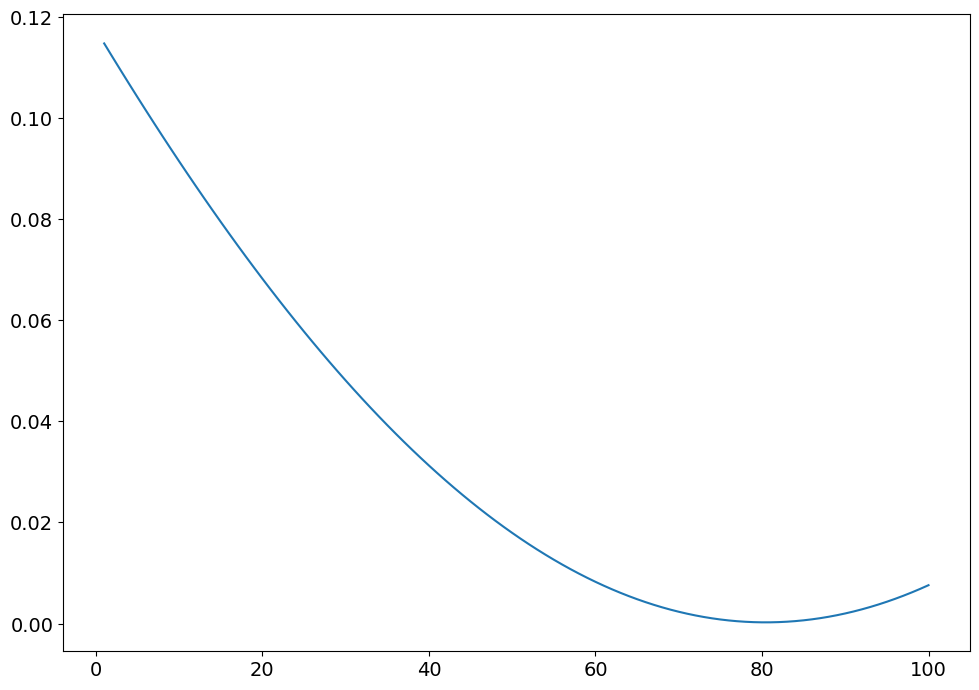

In [12]:
t_displace = np.linspace(0,0.02,10)
t_wait = np.linspace(0,0.08,10)

def overlapWithIdeal(epsilon):
    ideal  = CD_ideal_operator(1j)*vac
    exp = Rx(np.pi)*ECD_exp(vac, t_displace, t_wait, 1, epsilon = epsilon)
    overlap = exp.overlap(ideal)
    
    return 1-abs(overlap)

eps = np.linspace(1,100,100)

overlaps = []
for i in eps:
    overlaps.append(overlapWithIdeal(i))
plt.plot(eps,overlaps)
print(eps[np.argmin(overlaps)])
epsilon = eps[np.argmin(overlaps)]


In [13]:
def ECD_exp(state: qt.Qobj, t_displace: list, t_wait: list, alpha_scale,  epsilon, chi = CHI, loss = None):
    if loss == None:
        # Execute ECD sequence as specifiedin in A.Eickbusch paper.
        psi1 = D(state,t_displace, alpha_scale*epsilon, chi) # first displacement
        psi2 = qt.mesolve(H_dispersive(chi), psi1, t_wait).states[-1] # wait for time t_list[-1]
        psi3 = D(psi2,t_displace,  -alpha_scale*epsilon*np.cos(chi*t_wait[-1]/2), chi) # first negative displacement
        psi4 = Rx(np.pi)*psi3
        psi5 = D(psi4, t_displace, -alpha_scale*epsilon*np.cos(chi*t_wait[-1]/2), chi)
        psi6 = qt.mesolve(H_dispersive(chi), psi5, t_wait).states[-1]
        psi7 = D(psi6, t_displace, alpha_scale*epsilon*np.cos(chi*t_wait[-1]), chi)
        return [psi1,psi2,psi3,psi4,psi5,psi6,psi7]

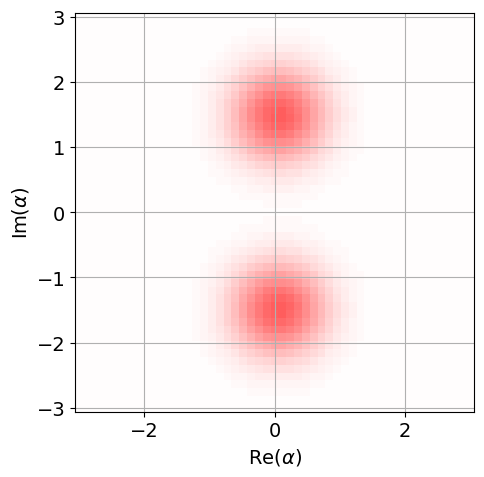

In [14]:
superpos = Rx(np.pi/2)*vac
states =  ECD_exp(superpos,t_displace, t_wait, 3, epsilon)

plot_wigner(states[6])

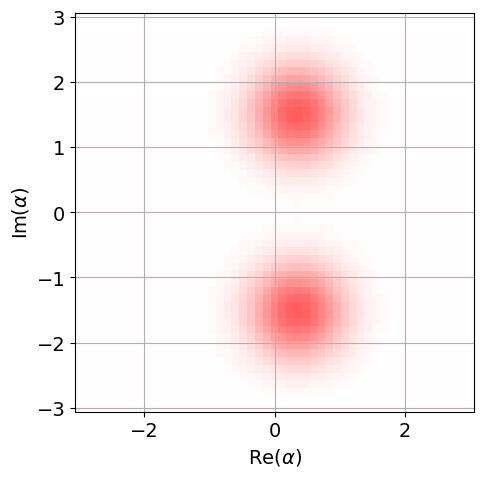

In [8]:
superpos = Rx(np.pi/2)*vac
states =  ECD_exp(superpos,t_displace, t_wait, 3, epsilon)

plot_wigner(states[6])

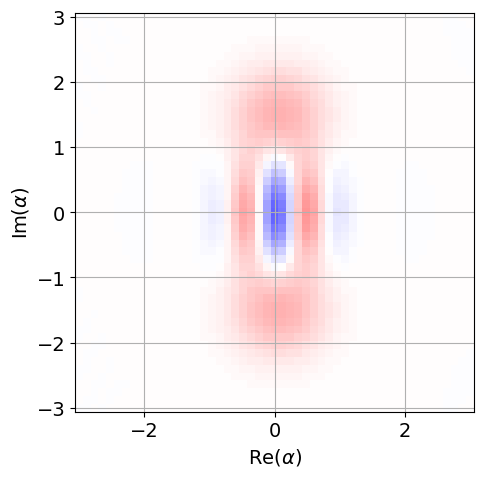

In [37]:
cat = proj_g*Ry(np.pi/2)*states[6]
plot_wigner(cat)

In [41]:
print(rx(np.pi))


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]


In [49]:
print(qt.ket2dm(ry(np.pi/2)*qt.fock(2,0)))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


In [52]:
print(rx(np.pi))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]
